In [1]:
import sys
sys.path.insert(0, '../util')
sys.path.insert(0, '..')
from sc import *
import matplotlib.pyplot as plt
import matplotlib
from alg import hstar
from plot import plot_paths, plot_sc

In [2]:
def plot_sc(SC, ax=None):
    for i, face in enumerate(SC.faces):
        if SC.face_vec[i]:
            continue
        color = 'darkgray'
        n1, n2, n3 = face
        tri = np.vstack([SC.nodes[n1], SC.nodes[n2], SC.nodes[n3]])
        ti = plt.Polygon(tri, color=color)#, alpha=alpha_val)
        plt.gca().add_patch(ti)

    for i, edge in enumerate(SC.edges):
        if SC.edge_vec[i] == 0:
            continue
        n1, n2 = edge
        line = np.vstack([SC.nodes[n1], SC.nodes[n2]])

        plt.plot(line[:,0], line[:,1], color='black', linewidth=1, alpha=0.2)
        plt.axis('off')

    active_nodes = SC.node_vec.astype(bool)

    plt.scatter(SC.nodes[active_nodes,0], SC.nodes[active_nodes,1], color='black', s=1.5)

def plot_paths(SC, paths, color, label, ax=None, figsize=(6,6)):
    matplotlib.style.use('default')
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1,1,1)
        plot_sc(SC)
    for path in paths:
        for edge in path.edges:
            n1, n2 = edge
            x1, y1 = SC.nodes[n1]
            x2, y2 = SC.nodes[n2]
            dx, dy = x2 - x1, y2 - y1
            ax.arrow(x1, y1, dx, dy, color=color, width=0.01, length_includes_head=True)

        start_and_end = np.array([path.nodes[0], path.nodes[-1]])

        ax.scatter(SC.nodes[start_and_end, 0], SC.nodes[start_and_end, 1], color='black', s=50, marker='*')

# Example 1

In [3]:
K = SimplicialComplex(9, False, False, True)
K.make_holes([(-0.5,-0.5), (-0.5,0.5), (0.5,-0.5), (0.5,0.5)])

In [4]:
paths = []
paths.append(path_from_coords(K, [(-1,-1), (-1,1), (1,1)]))
paths.append(path_from_coords(K, [(-1,-1), (1,-1), (1,1)]))
paths.append(path_from_coords(K, [(-1,-1), (0,-1), (0, 1), (1,1)]))
paths.append(path_from_coords(K, [(-1,-1), (-1,0), (1,0), (1,1)]))
paths.append(paths[0] - paths[2] + paths[1])
paths.append(path_from_coords(K, [(-1,-1), (-1,1), (0,1), (0,-1), (1, -1), (1, 1)]))
paths.append(paths[5] - paths[3])

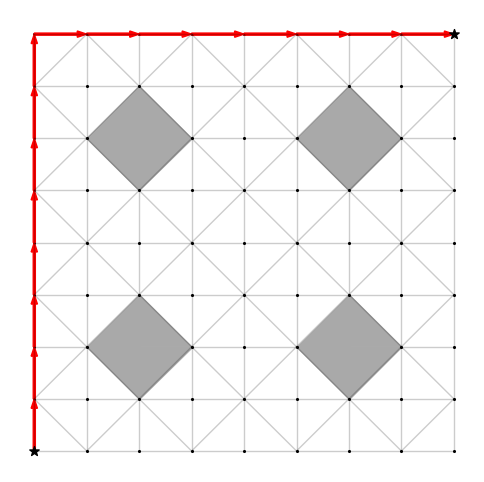

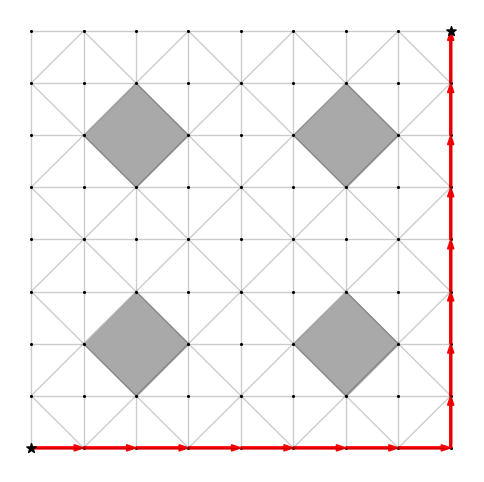

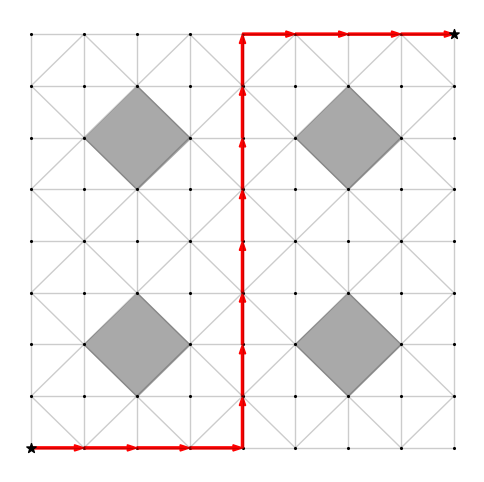

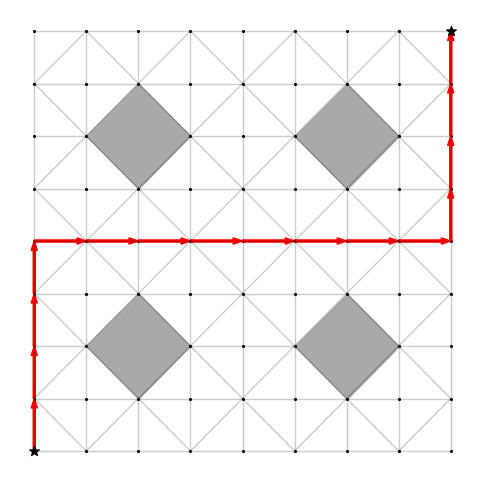

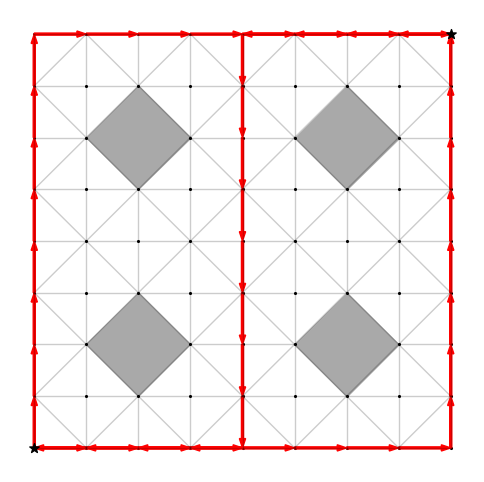

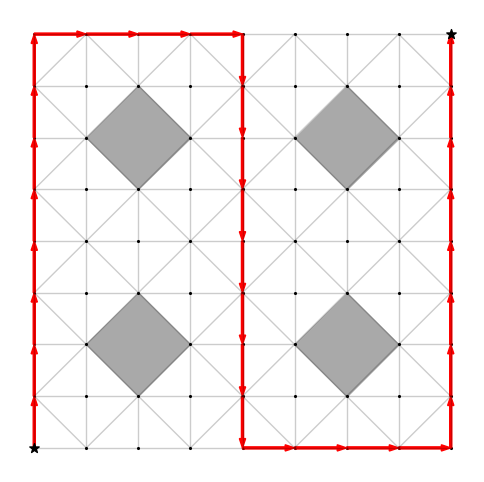

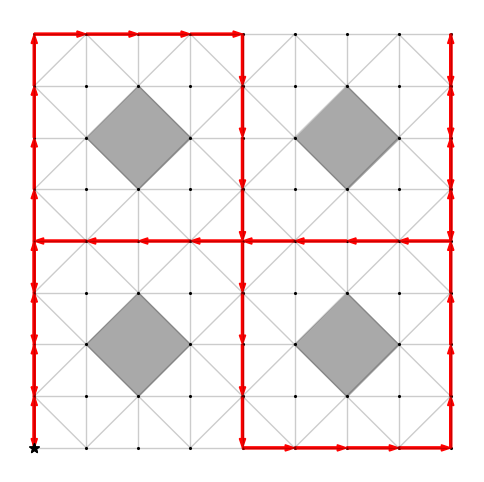

In [5]:
for path in paths:
    plot_paths(K, [path], 'r', '')
# plot_paths(K, [path2], 'b', '')
# plot_paths(K, [path3], 'g', '')
# plot_paths(K, [path4], 'k', '')

In [6]:
for i, path in enumerate(paths):
    print(i, path.weight, np.round(path.proj, 5))

0 4.0 [-0.26205 -0.57385  0.65075  0.93486]
1 4.0 [-0.8933   0.07268 -0.65075 -0.6846 ]
2 4.0 [ 0.54956 -0.47976 -0.63428  0.104  ]
3 4.0 [-0.03313  0.70378  0.63428 -0.21587]
4 12.0 [-1.70491 -0.02141  0.63428  0.14626]
5 8.0 [-1.70491 -0.02141  0.63428  0.14626]
6 12.0 [-1.67178 -0.72519  0.       0.36213]


In [7]:
paths[-1].cost(paths[3].proj, 2, True)

array([ 1.94454877,  2.11696622,  2.22769432,  2.36883293,  2.60036569,
        2.91548507,  3.31028544,  3.72293685,  4.05917687,  4.39893769,
        4.84916553,  5.33097812,  5.79523685,  6.06456816,  6.35941906,
        6.66989454,  6.97143127,  7.25565257,  7.53986656,  7.82971539,
        8.10578105,  8.3747519 ,  8.69601149,  9.03698853,  9.33825667,
        9.64317195, 10.01249765, 10.39573995, 10.72406946, 10.99651223,
       11.22791486, 11.46786142, 11.71584397, 11.96786142, 12.22791486,
       12.49651223, 12.72406946, 13.04330952, 13.42493836, 13.82489164,
       14.20533346, 14.57039824, 14.94103324, 15.30281178, 15.61534213,
       15.81953793, 16.09442848, 16.39309476, 16.67483005])

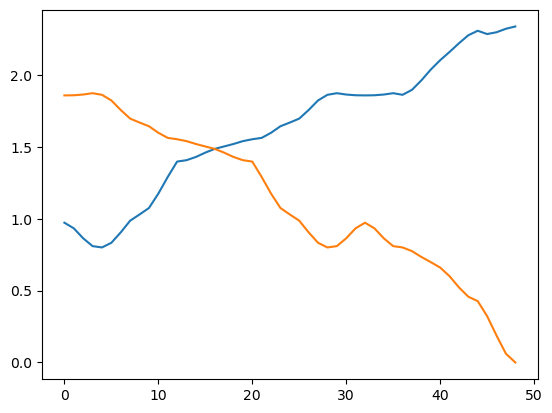

In [8]:
plt.plot(paths[-1].proj_diff(paths[3], True))
plt.plot(paths[-1].proj_diff(paths[-1], True))
plt.show()

# Example 2

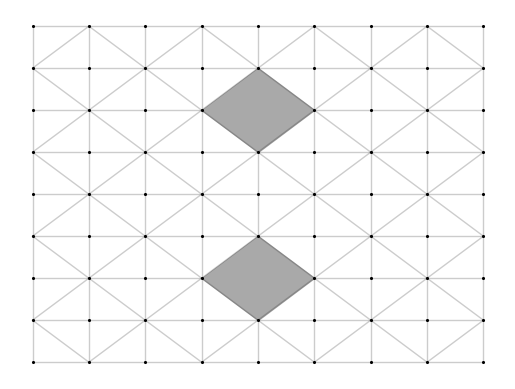

In [9]:
K2 = SimplicialComplex(9, False, False, True)
K2.make_holes([(0,-0.5), (0,0.5)])
plot_sc(K2)

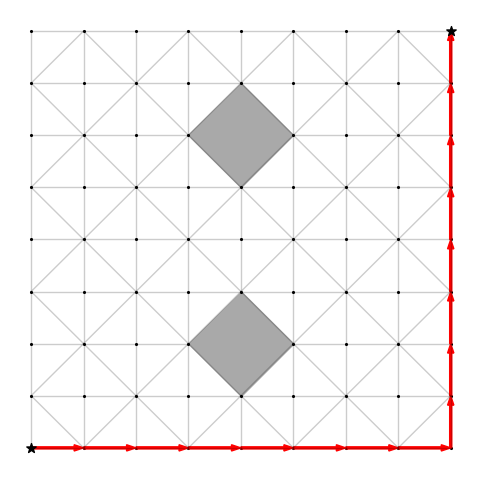

In [10]:
p1 = path_from_coords(K2, [(-1,-1), (1,-1), (1,1)])
plot_paths(K2, [p1], 'r', '')

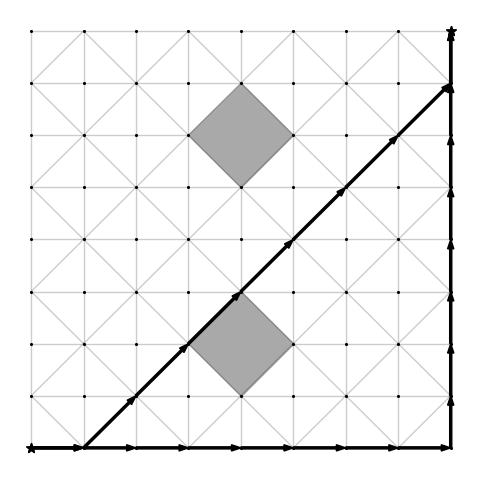

In [11]:
alpha_k2 = 0.1
path, _, _, _, _ = hstar(K2, p1[0], p1[-1], p1.proj, alpha_k2, False, False)
plot_paths(K2, [p1, path], 'k', '')